In [ ]:
##padded raw data from cohort-new_ehr.csv
raw_data = []
max_len = 0
for _, e in raw_ehr.items():
    raw_data.append(e)
    if len(e) >= max_len:
        max_len = len(e)
for idx, s in enumerate(raw_data):
    raw_data[idx] = s + [0]*(max_len-len(s))

In [ ]:
##
lstm_mrn_encoded_disease = []
for m in lstm_mrns:
    lstm_mrn_encoded_disease.append(mrn_disease[m][0])


In [ ]:
disease_dict = {}
idx = 0
for d in set(mrn_encoded_disease):
    disease_dict[d] = idx
    idx += 1

mrn_raw_disease = []
for m in raw_ehr:
    mrn_raw_disease.append(mrn_disease[m][0])

##comorbidities vs OTH
mrn_raw_disease = []
for m in raw_ehr:
    if len(mrn_disease[m]) == 1:
        mrn_raw_disease.append(mrn_disease[m][0])
    else: 
        mrn_raw_disease.append('-'.join(mrn_disease[m][0::]))

##consider two classes
mrn_raw_disease = []
for m in raw_ehr:
    if mrn_disease[m] == 'OTH':
        mrn_raw_disease.append(mrn_disease[m][0])
    else: 
        mrn_raw_disease.append('disorder')

In [37]:
##consider two classes: disease vs OTH
mrn_encoded_disease = []
for m in mrns:
    if mrn_disease[m][0] == 'OTH':
        mrn_encoded_disease.append(mrn_disease[m][0])
    else:
        mrn_encoded_disease.append('disorder')

##consider two classes
mrn_raw_disease = []
for m in raw_ehr:
    if mrn_disease[m][0] == 'OTH':
        mrn_raw_disease.append(mrn_disease[m][0])
    else: 
        mrn_raw_disease.append('disorder')
        

In [12]:
mrn_encoded_disease = []
for m in mrns:
    if len(mrn_disease[m]) == 1:
        mrn_encoded_disease.append(mrn_disease[m][0])
    else:
        mrn_encoded_disease.append('-'.join(mrn_disease[m][0::]))

In [38]:
disease_dict = {}
idx = 0
for d in set(mrn_encoded_disease):
    disease_dict[d] = idx
    idx += 1


In [24]:
mrn_raw_disease = []
for m in raw_ehr:
    if len(mrn_disease[m]) == 1:
        mrn_raw_disease.append(mrn_disease[m][0])
    else: mrn_raw_disease.append('-'.join(mrn_disease[m][0::]))

In [ ]:
count_dis = {}
for d in mrn_encoded_disease:
    if d in count_dis:
        count_dis[d] += 1
    else:
        count_dis[d] = 1
print(count_dis)

In [50]:
freq_term(raw_ehr, mrns, n_clust_en, label_en, 8, ['icd9', 'medication'])

Cluster 0 numerosity: 2441
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Attention deficit disorder with hyperactivity::314.01::C1263846 = 0.43 (count term 19915 -- N patients 1443)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Routine infant or child health check::V20.2::C0260545 = 0.85 (count term 12040 -- N patients 1544)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Asthma, unspecified type, unspecified::493.90::C0155886 = 0.60 (count term 7419 -- N patients 961)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Need for prophylactic vaccination and inoculation against influenza::V04.81::C1260452 = 0.63 (count term 5476 -- N patients 1424)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Personal history of allergy to medicinal agents::V14::C0260483 = 0.44 (count term 4570 -- N patients 1080)
Cluster 0 -- Relative numerosity of first most frequent term:medication::Aerosol::324049::C111

## Raw count data

In [6]:


# with open(os.path.join(experiment_folder, "raw_data_scaled.csv"), 'w') as f:
#     wr = csv.writer(f, delimiter=',')
#     for r in raw_data_scaled:
#         wr.writerow(r)

In [7]:
# ##T-SNE


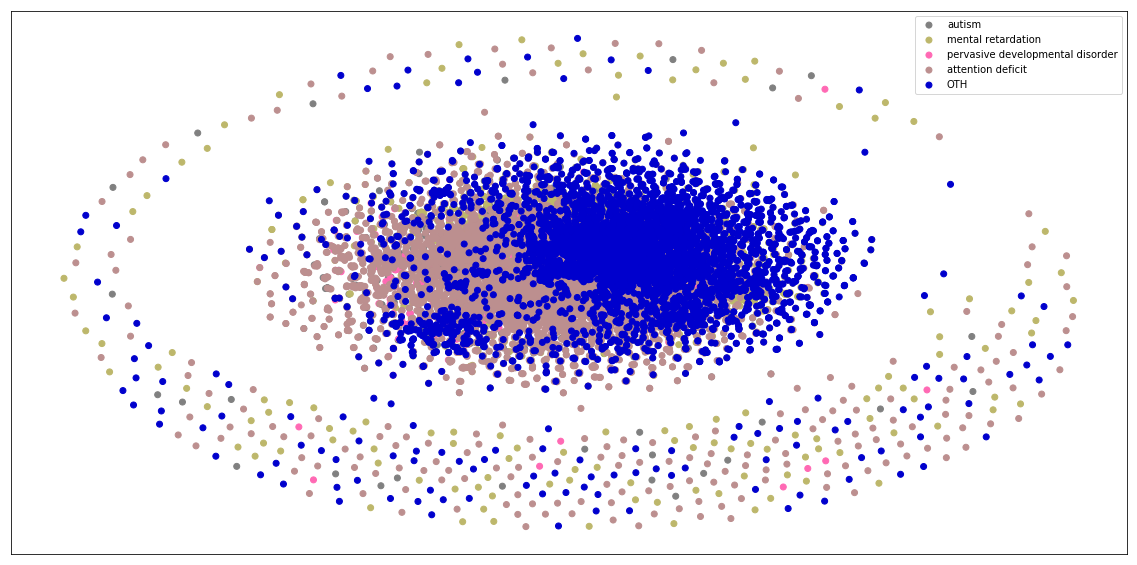

In [8]:
colors_raw1 = [colormap[disease_dict[v]] for v in mrn_raw_disease]
single_plot(raw_tsne, mrn_raw_disease, colors_raw1)

In [9]:
#nonoverlap_plot(raw_tsne, mrn_raw_disease, colors_raw1)

In [10]:
n_clust_raw, label_raw, list_silh = hclust_ehr(raw_data_scaled, 5, 6, 'euclidean')

5 0.6446157947260885
Number of clusters found:5, Silhouette score:0.645


In [11]:
##Entropy for clustering
clust_entropy(mrn_raw_disease, label_raw)

Cluster 0 -- Entropy: 1.836, Purity: 0.404
Cluster 1 -- Entropy: 1.641, Purity: 0.479
Cluster 2 -- Entropy: 0.000, Purity: 1.000
Cluster 3 -- Entropy: 0.000, Purity: 1.000
Cluster 4 -- Entropy: 0.000, Purity: 1.000
Average Entropy for clustering: 1.649
Average Purity for clustering: 0.475


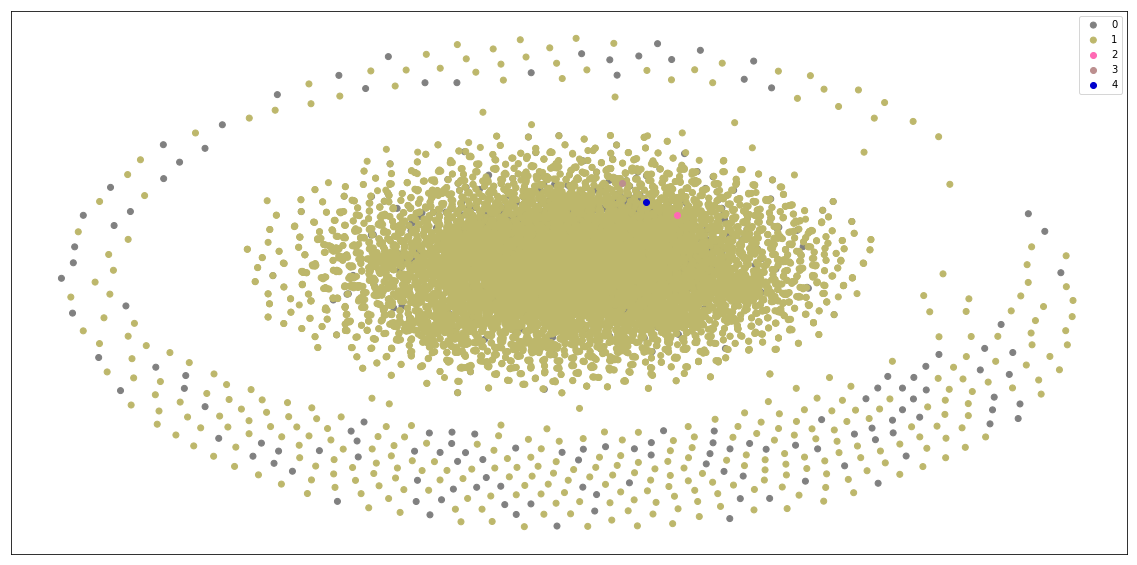

In [12]:
colors_raw2 = [colormap[v] for v in label_raw]
single_plot(raw_tsne, label_raw, colors_raw2)

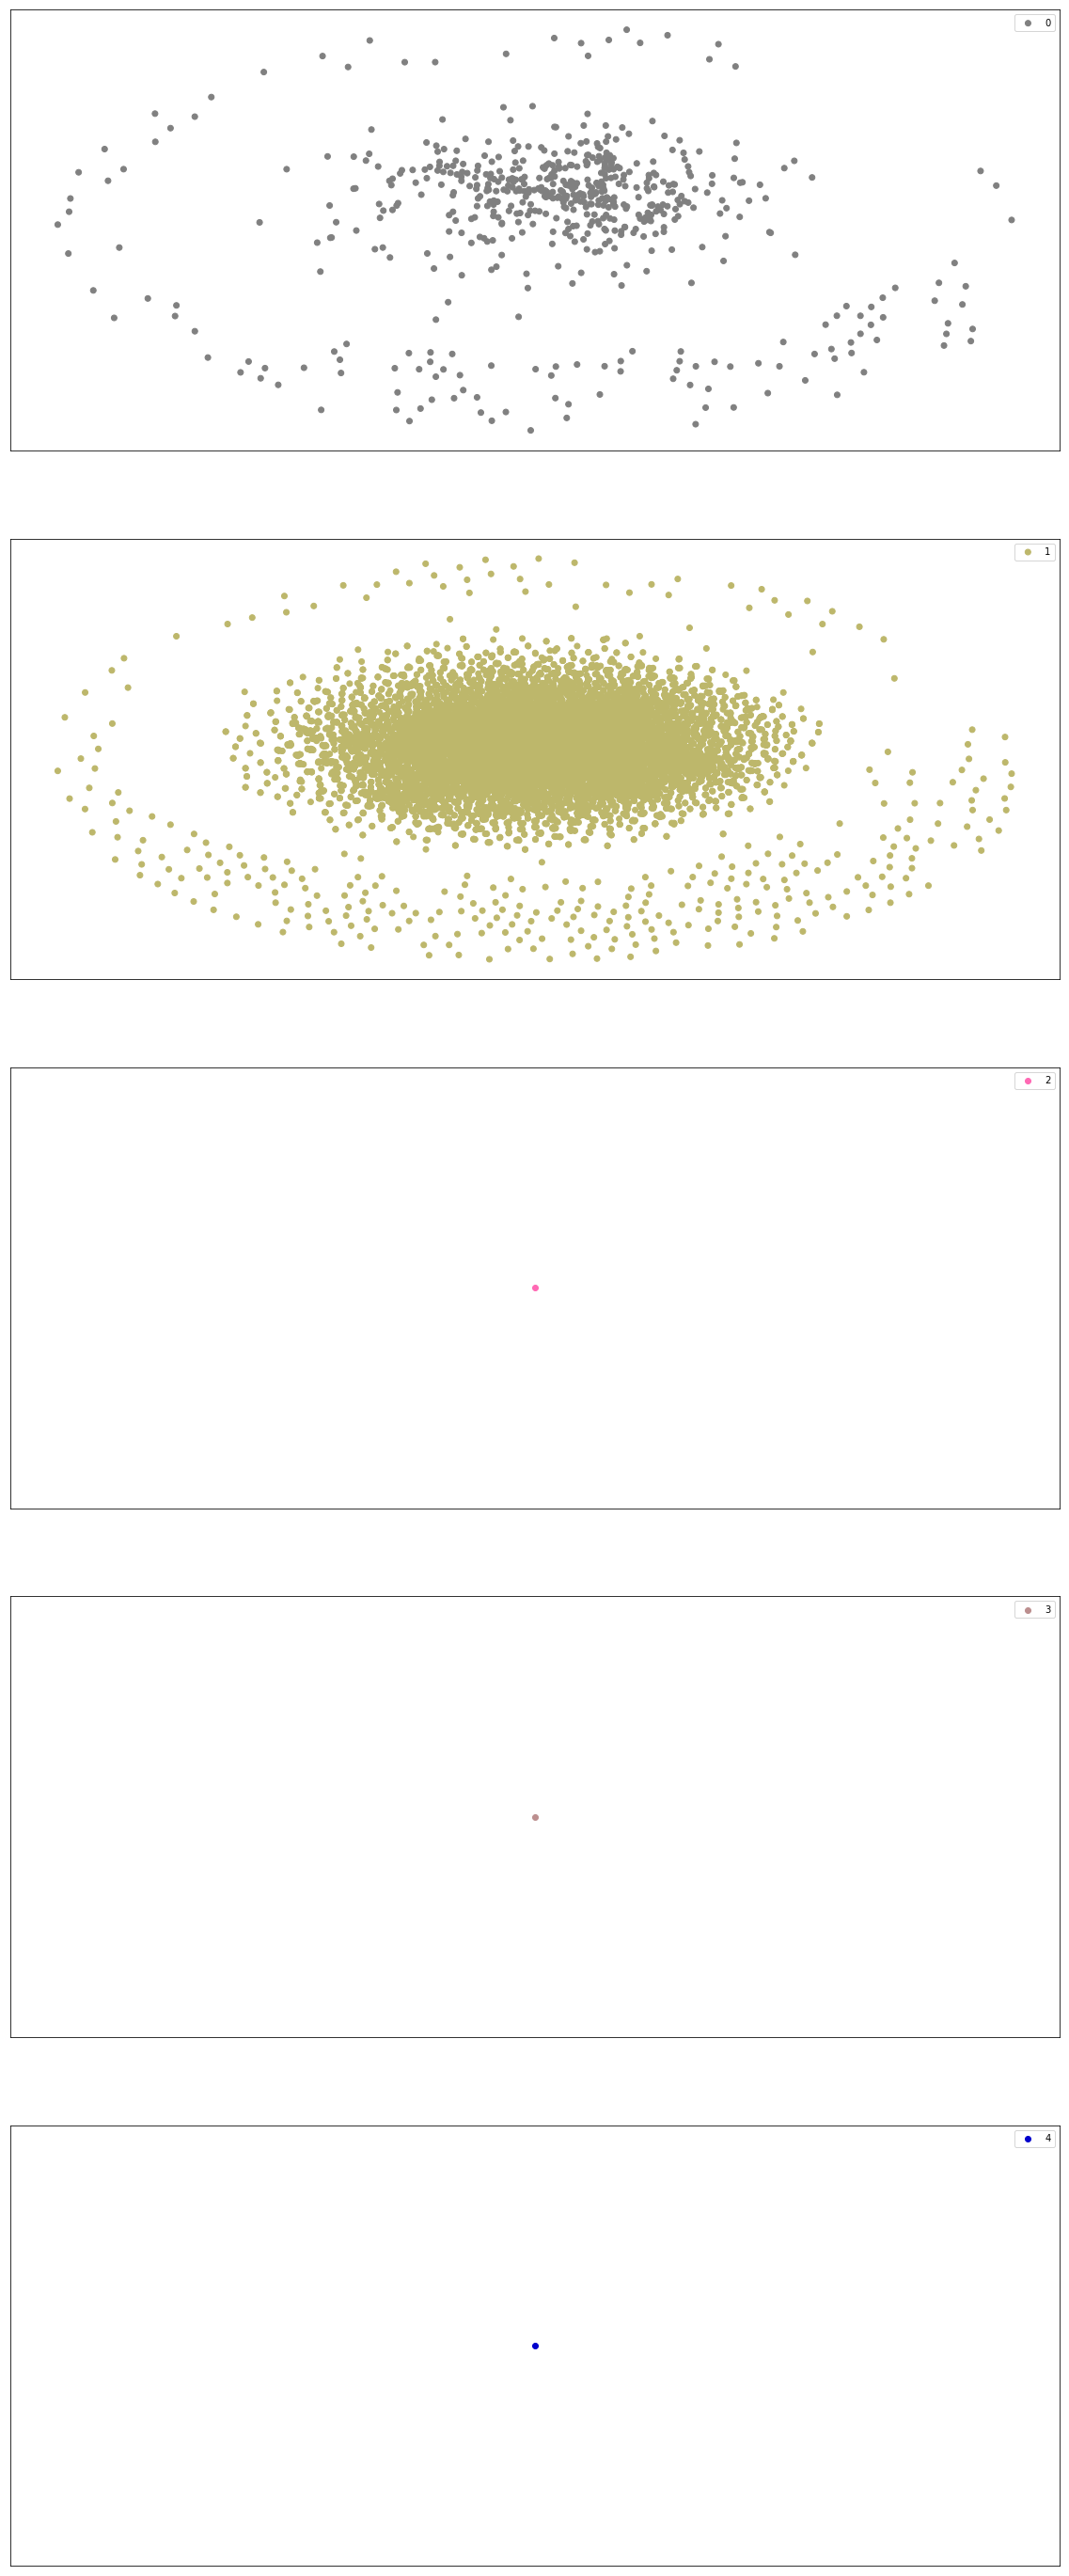

In [15]:
nonoverlap_plot(raw_tsne, label_raw, colors_raw2)

In [16]:

freq_term(raw_ehr, mrn_list, n_clust_raw, label_raw, 5, ['icd9', 'medication'])

Cluster 0 numerosity: 584
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Unspecified essential hypertension::401.9::C0085580 = 0.36 (count term 3477 -- N patients 286)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Diabetes mellitus without mention of complication, type ii or unspecified type, not stated as uncontrolled::250.00::C0375113 = 0.46 (count term 2700 -- N patients 161)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Personal history of allergy to medicinal agents::V14::C0260483 = 0.25 (count term 2626 -- N patients 446)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Unspecified intellectual disabilities::319::C3161331 = 0.36 (count term 2176 -- N patients 250)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Personal history of allergy, other than to medicinal agents, presenting hazards to health::V15.0::C0877841 = 0.36 (count term 2078 -- N patients 314)


Cluster 1 numerosity: 

## Count data

In [25]:


# with open(os.path.join(experiment_folder, "svd_mat.csv"), 'w') as f:
#     wr = csv.writer(f, delimiter=',')
#     for s in svd_mat:
#         wr.writerow(s)

In [26]:
# ##T-SNE


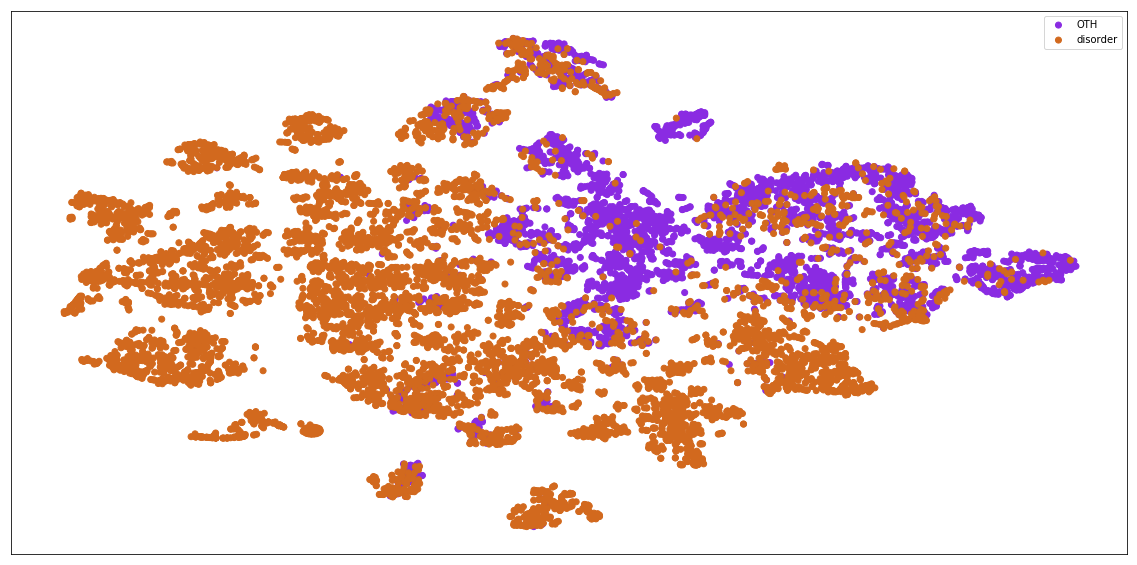

In [43]:
colors_count1 = [colormap[disease_dict[v]] for v in mrn_raw_disease]
single_plot(count_tsne, mrn_raw_disease, colors_count1)

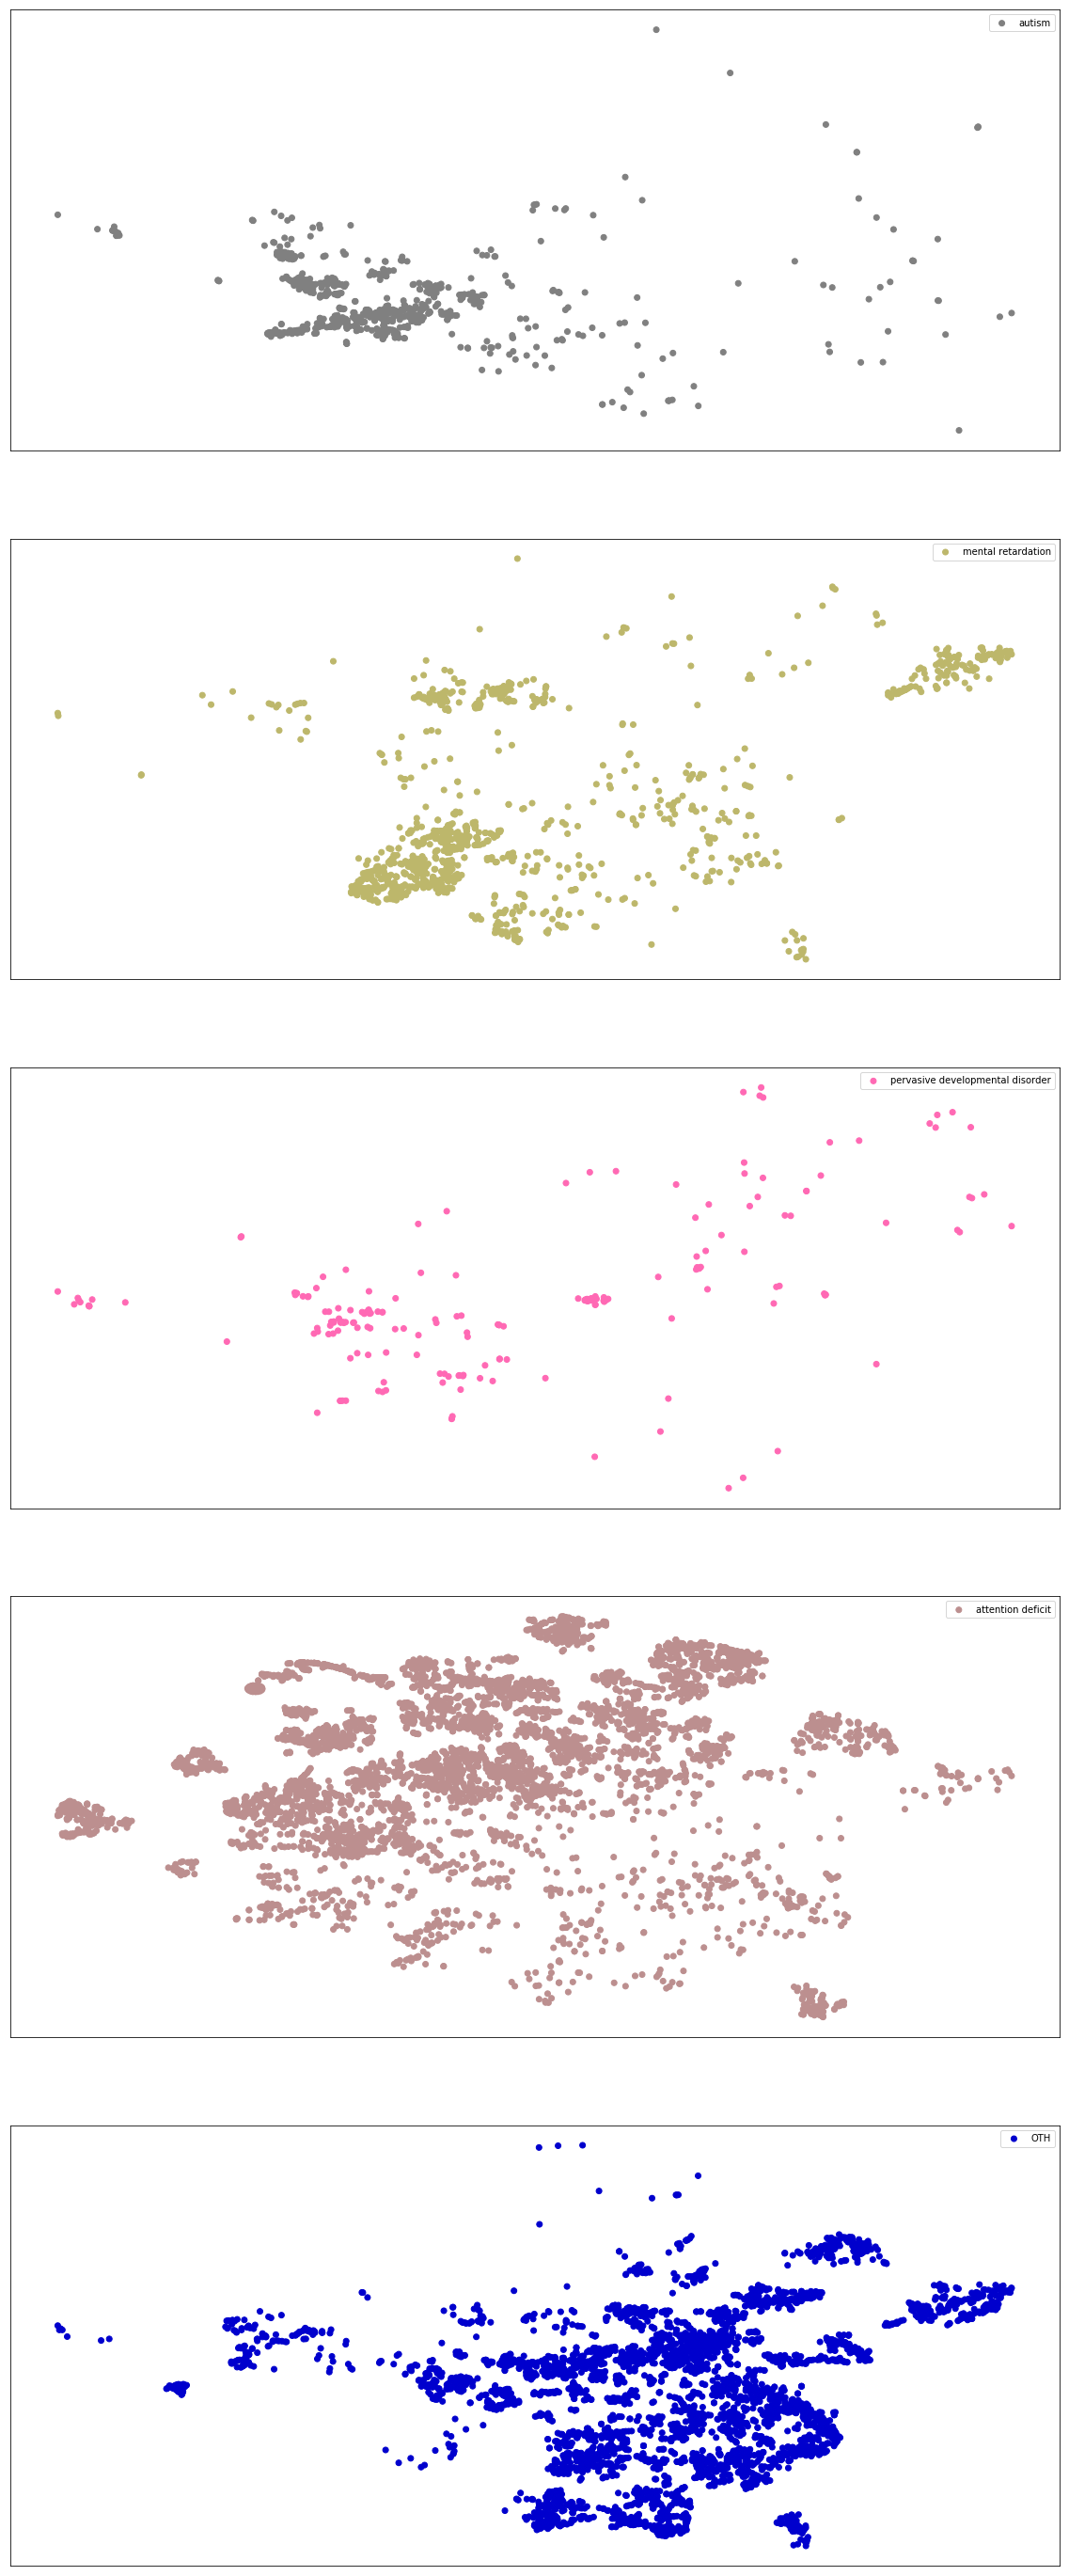

In [41]:
nonoverlap_plot(count_tsne, mrn_raw_disease, colors_count1)

In [54]:
n_clust_count, label_count, list_silh = hclust_ehr(svd_mat, 11, 12, 'euclidean')

11 0.2206445575763392
Number of clusters found:11, Silhouette score:0.221


In [45]:
##External validation
clust_entropy(mrn_raw_disease, label_count)

Cluster 0 -- Entropy: 0.967, Purity: 0.607
Cluster 1 -- Entropy: 0.000, Purity: 1.000
Average Entropy for clustering: 0.918
Average Purity for clustering: 0.627


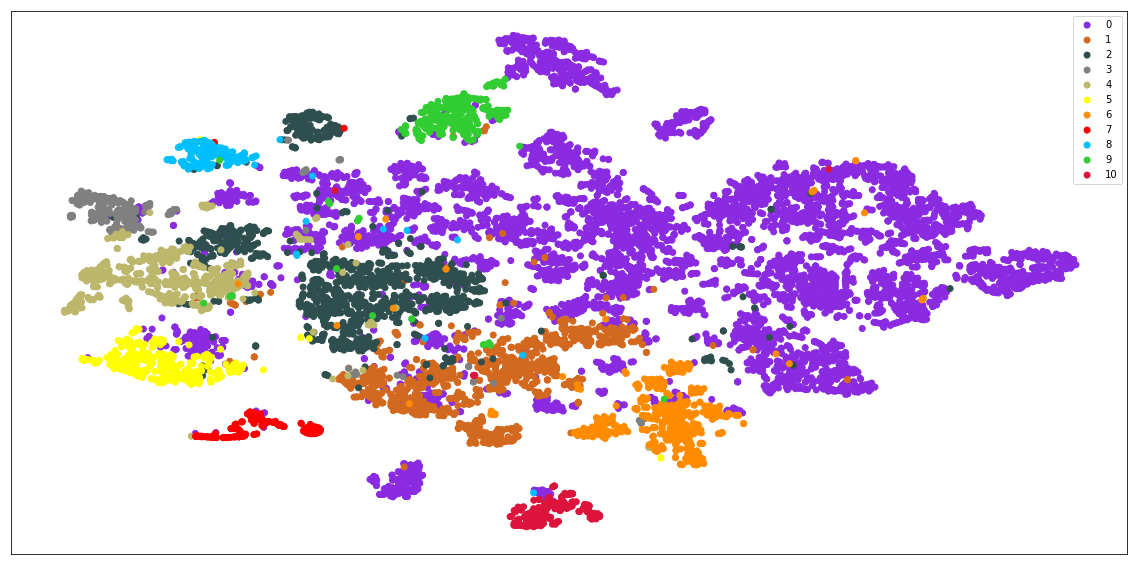

In [55]:
colors_count2 = [colormap[v] for v in label_count]
single_plot(count_tsne, label_count, colors_count2)

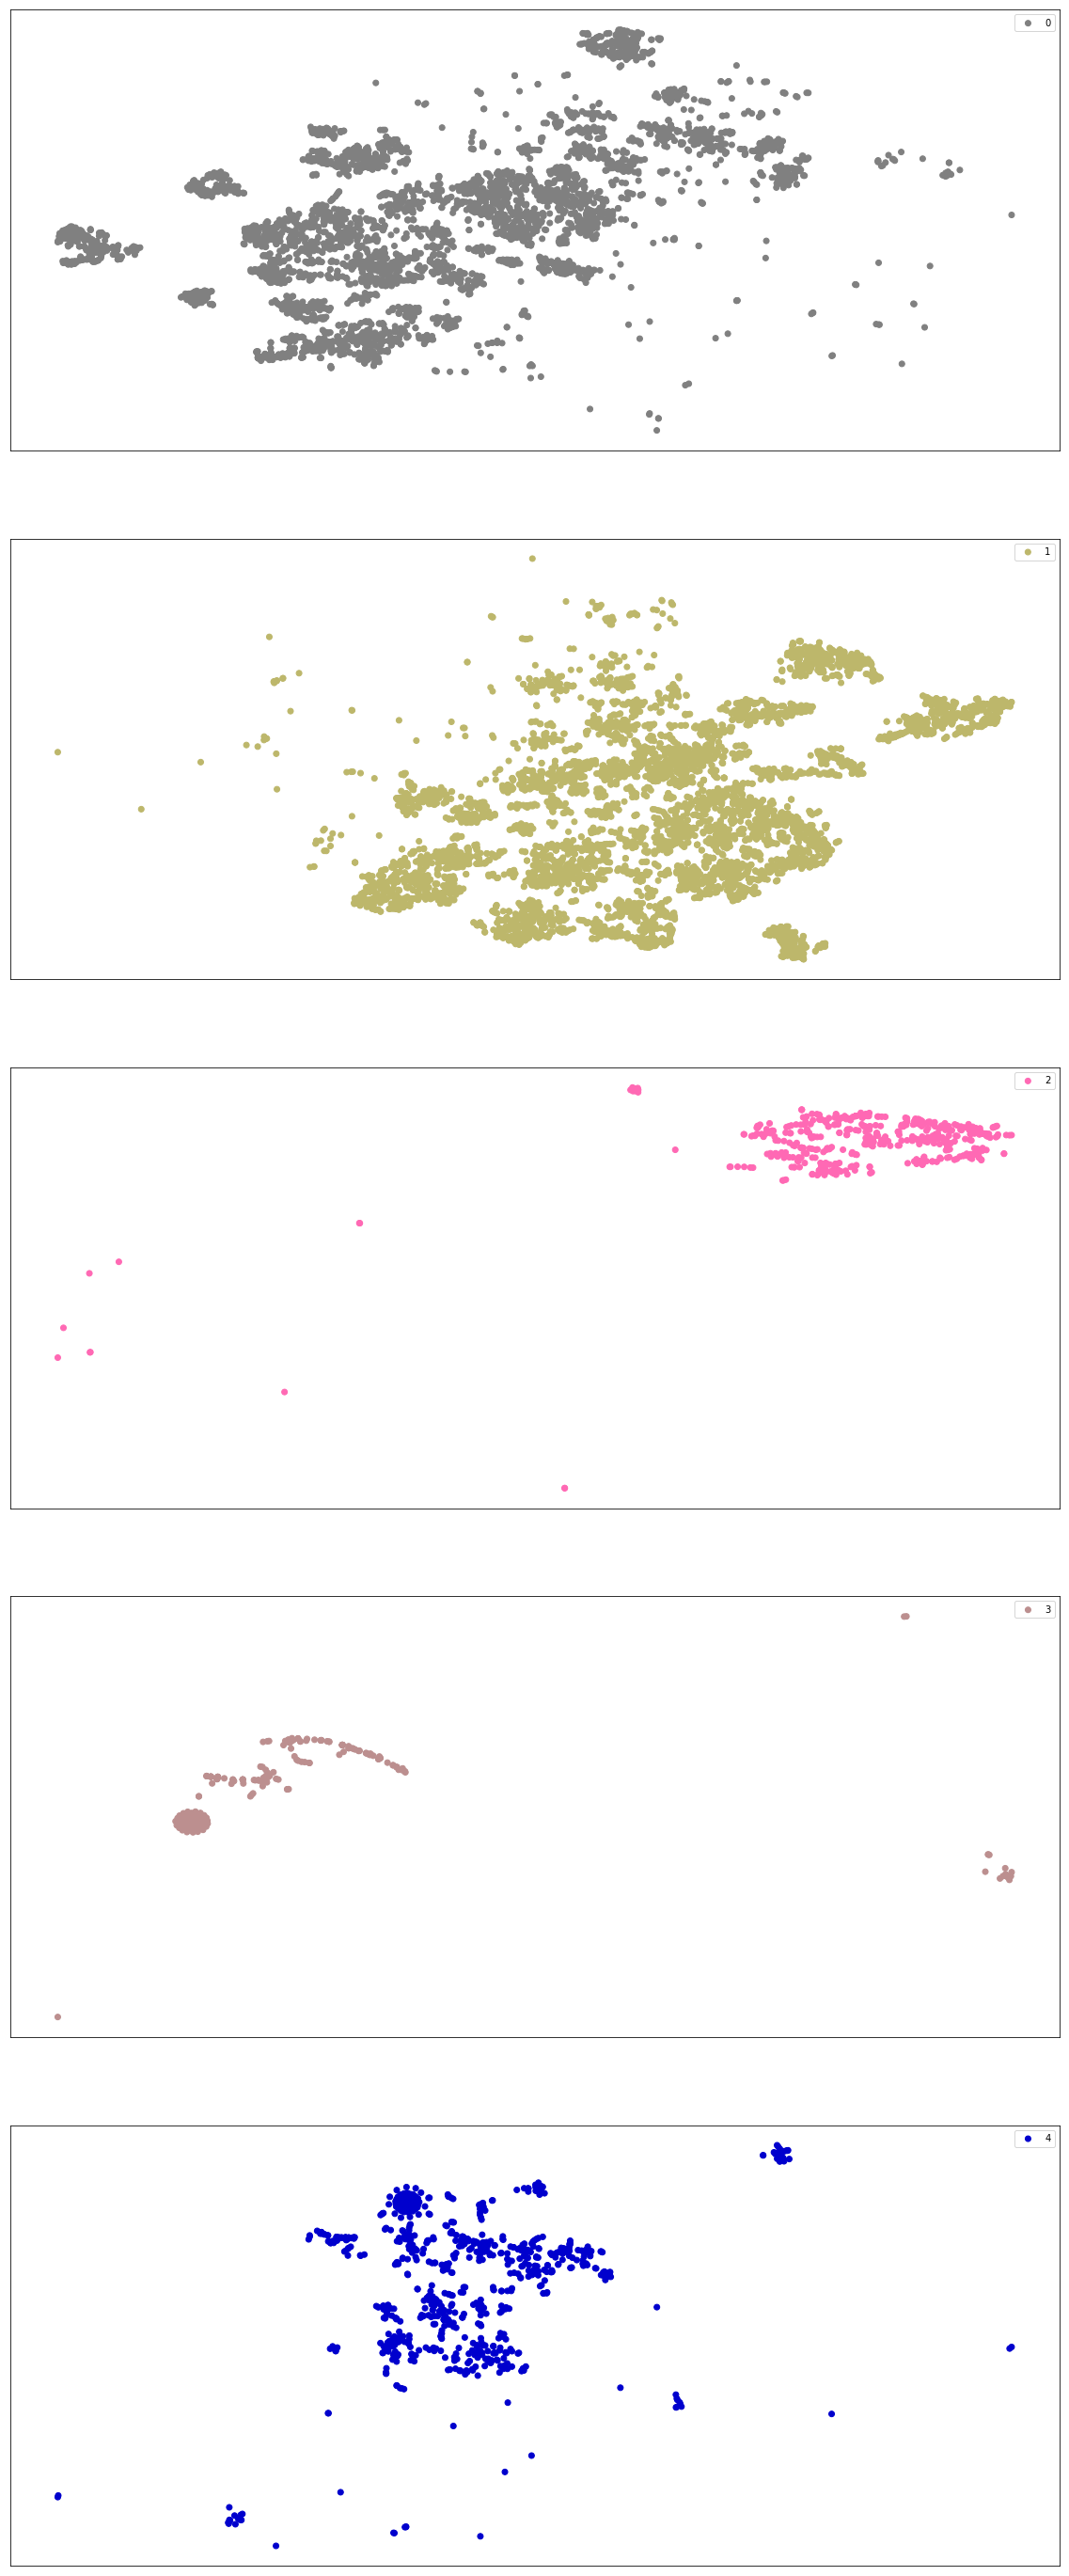

In [40]:
nonoverlap_plot(count_tsne, label_count, colors_count2)

In [56]:
mrn_list = [m for m in raw_ehr.keys()]
freq_term(raw_ehr, mrn_list, n_clust_count, label_count, 8, ['icd9', 'medication'])

Cluster 0 numerosity: 7515
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Unspecified essential hypertension::401.9::C0085580 = 0.94 (count term 9097 -- N patients 1716)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Attention deficit disorder with hyperactivity::314.01::C1263846 = 0.18 (count term 8491 -- N patients 1512)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Personal history of allergy to medicinal agents::V14::C0260483 = 0.55 (count term 5706 -- N patients 2183)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Diabetes mellitus without mention of complication, type ii or unspecified type, not stated as uncontrolled::250.00::C0375113 = 0.93 (count term 5509 -- N patients 786)
Cluster 0 -- Relative numerosity of first most frequent term:icd9::Depressive disorder, not elsewhere classified::311::C0868892 = 0.65 (count term 5130 -- N patients 848)
Cluster 0 -- Relative numerosity of first most frequent

## Clustering LSTM encoded vectors

### tSNE with the original classes: **selected diseases** vs **OTH**

In [ ]:
##run the TSNE on data
lstm_encoded_tsne = tsne.fit_transform(lstm_encoded_vect).tolist()

In [ ]:
len(lstm_mrns)

In [ ]:
colors_lstmen1 = [colormap[disease_dict[v]] for v in lstm_mrn_encoded_disease]
single_plot(lstm_encoded_tsne, mrn_encoded_disease, colors_lstmen1)

In [ ]:
#nonoverlap_plot(encoded_tsne, mrn_encoded_disease, colors_en1)

In [ ]:
##Apply hierarchical clustering to encoded data
n_clust_lstmen, label_lstmen = hclust_ehr(lstm_encoded_vect, 9, 10, 'l1')

### tSNE of the cluster found by hierarchical clusters

In [ ]:
colors_lstmen2 = [colormap[v] for v in label_lstmen]
single_plot(lstm_encoded_tsne, label_lstmen, colors_lstmen2)

In [52]:
#nonoverlap_plot(encoded_tsne, label_en, colors_en2)

### Term frequencies inspection

In [ ]:
freq_term(raw_data, n_clust_lstmen, label_lstmen, 1, ['icd9', 'medication'])

# Save the hierarchical cluster labels.

In [ ]:
cluster = np.array([label_en, label_lstmen, label_raw, label_count]).T.tolist()

with open(os.path.join(experiment_folder, "cluster.csv"), 'w') as f:
    wr = csv.writer(f, delimiter=',')
    wr.writerow(["cnn+ae", "lstm", "raw", "count"])
    for c in cluster:
        wr.writerow(c)  

In [73]:
import sklearn.metrics as metrics
def disease_sim(model_mat, disease_vect, model):
    for d in set(disease_vect):
        tmp_mat = []
        result = []
        for idx, lab in enumerate(disease_vect):
            if lab == d:
                tmp_mat.append(model_mat[idx])
        pair_sim = np.abs(1 - metrics.pairwise.euclidean_distances(tmp_mat))
        mu = np.mean(pair_sim)
        sd = np.std(pair_sim)
        string = "Model {0} -- Disease {1}:: similarity ({2}, {3})".format(model, d, mu, sd)
        print(string)
        result += string
#     f.open(os.path.join(experiment_folder, "similarity_" + model + ".txt"), "w")
#     f.writelines([r for r in result])
#     f.close()    

In [74]:
disease_sim(encoded_vect, mrn_encoded_disease, 'cnn+ae')

Model cnn+ae -- Disease OTH:: similarity (33.529954199070495, 7.878293021364426)
Model cnn+ae -- Disease disorder:: similarity (32.540170478425885, 8.037934895480745)


In [75]:
disease_sim(svd_mat, mrn_raw_disease, 'count')

Model count -- Disease OTH:: similarity (0.6194808069919819, 0.1800988442958161)
Model count -- Disease disorder:: similarity (0.27736682975429716, 0.19332618793131678)


## Clustering CNN+AE encoded vectors

### tSNE with the original classes: **selected diseases** vs **OTH**

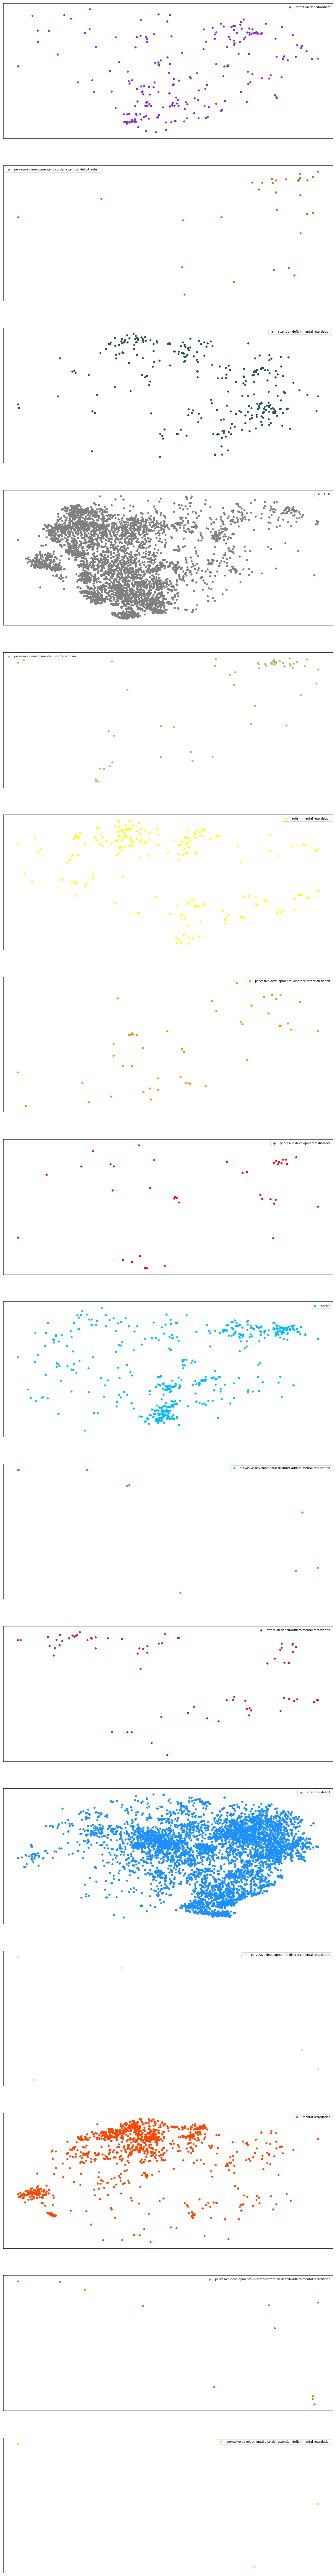

In [19]:
nonoverlap_plot(encoded_tsne, mrn_encoded_disease, colors_en1)

In [48]:
##Apply hierarchical clustering to encoded data
n_clust_en, label_en, list_silh = hclust_ehr(encoded_vect, 11, 12, 'euclidean')

11 0.02999585205716248
Number of clusters found:11, Silhouette score:0.030


In [41]:
##Entropy clusters vs classes
clust_entropy(mrn_encoded_disease, label_en)

Cluster 0 -- Entropy: 0.828, Purity: 0.739
Cluster 1 -- Entropy: 0.993, Purity: 0.550
Average Entropy for clustering: 0.892
Average Purity for clustering: 0.666


### tSNE of the cluster found by hierarchical clusters

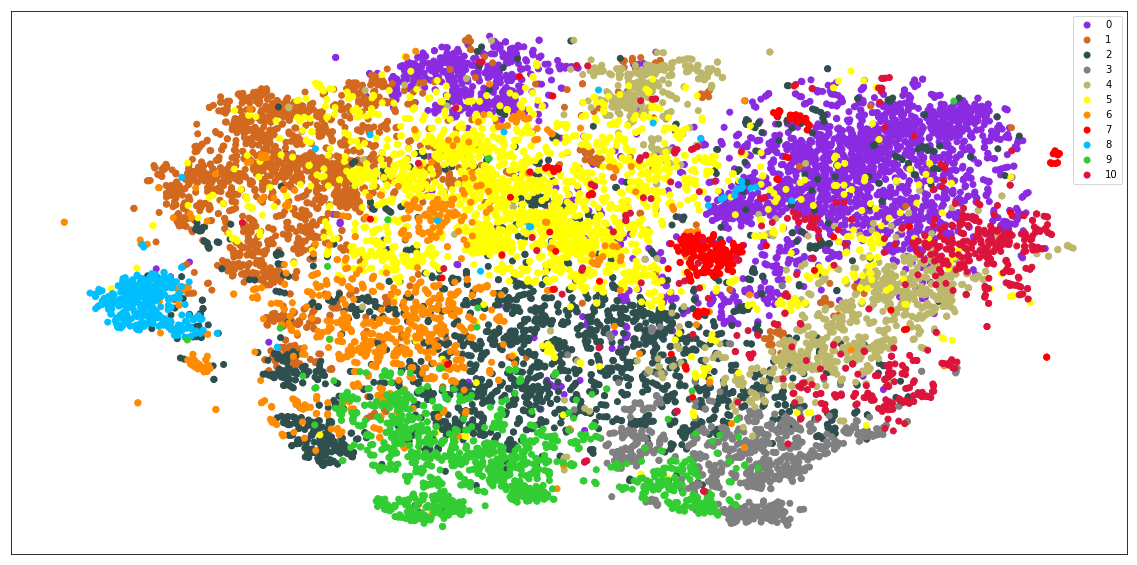

In [49]:
colors_en2 = [colormap[v] for v in label_en]
single_plot(encoded_tsne, label_en, colors_en2)

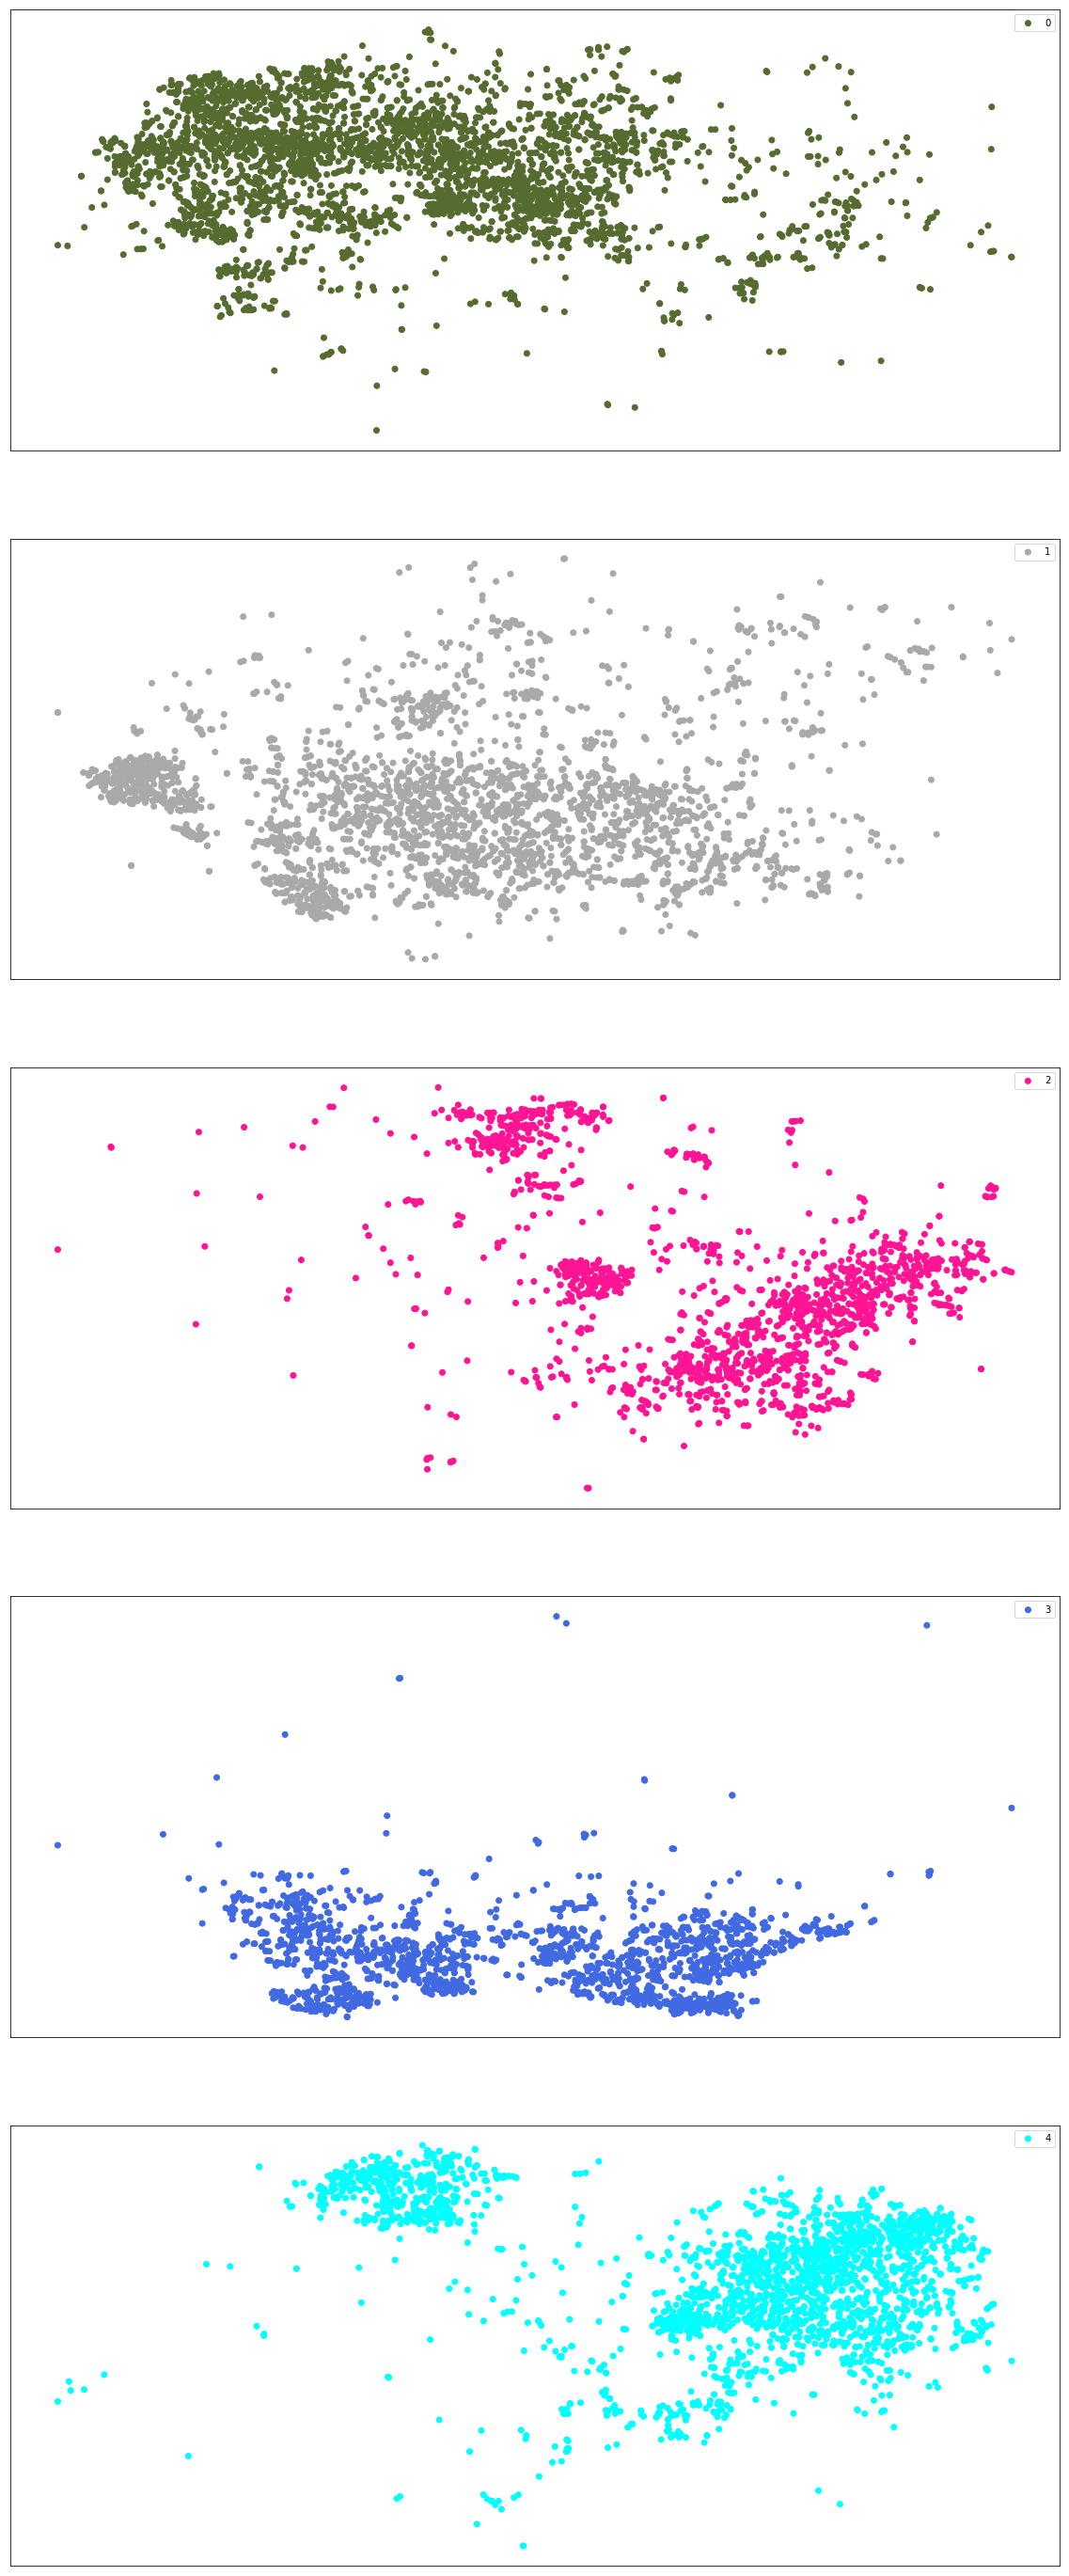

In [14]:
nonoverlap_plot(encoded_tsne, label_en, colors_en2)

### Term frequencies inspection

## Clustering CNN+AE encoded vectors

### tSNE with the original classes: **selected diseases** vs **OTH**

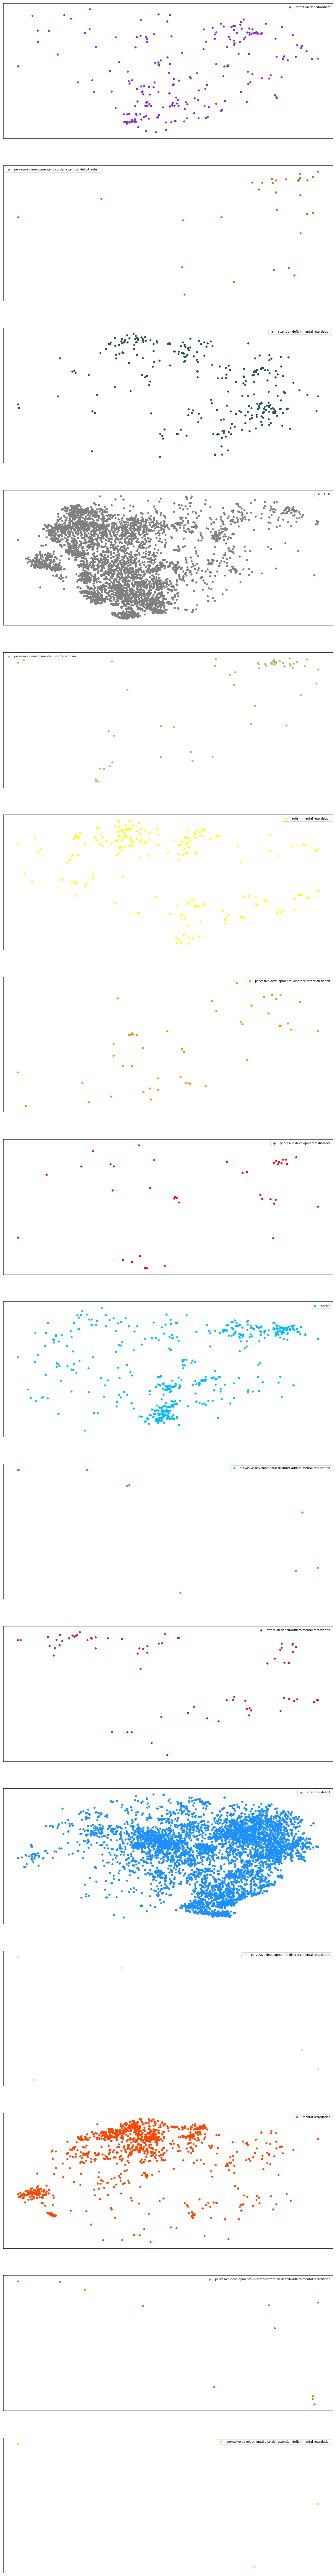

In [19]:
nonoverlap_plot(encoded_tsne, mrn_encoded_disease, colors_en1)

In [48]:
##Apply hierarchical clustering to encoded data
n_clust_en, label_en, list_silh = hclust_ehr(encoded_vect, 11, 12, 'euclidean')

11 0.02999585205716248
Number of clusters found:11, Silhouette score:0.030


In [41]:
##Entropy clusters vs classes
clust_entropy(mrn_encoded_disease, label_en)

Cluster 0 -- Entropy: 0.828, Purity: 0.739
Cluster 1 -- Entropy: 0.993, Purity: 0.550
Average Entropy for clustering: 0.892
Average Purity for clustering: 0.666


### tSNE of the cluster found by hierarchical clusters

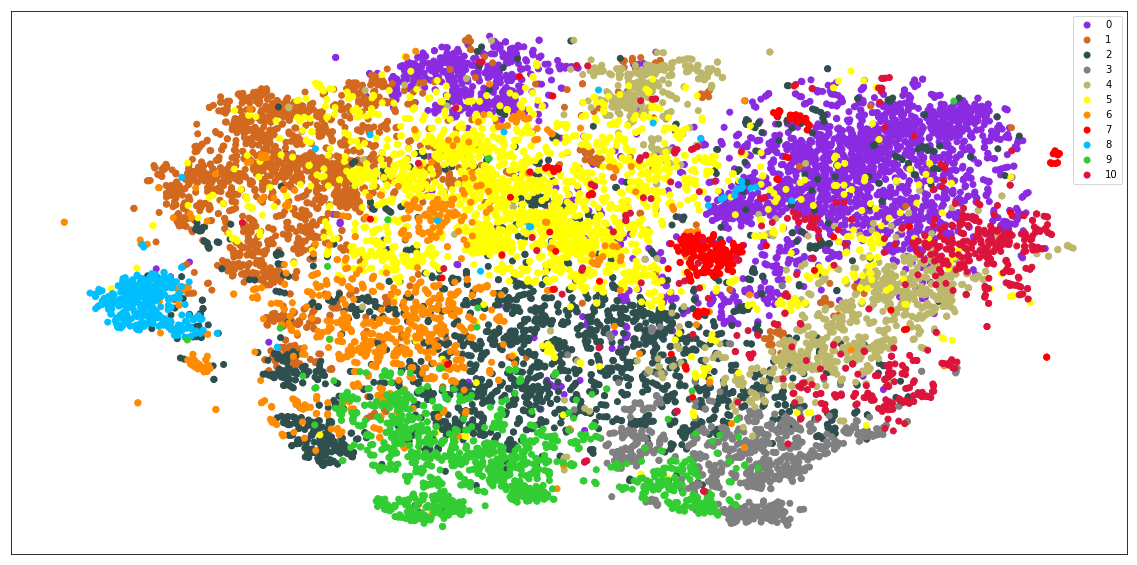

In [49]:
colors_en2 = [colormap[v] for v in label_en]
single_plot(encoded_tsne, label_en, colors_en2)

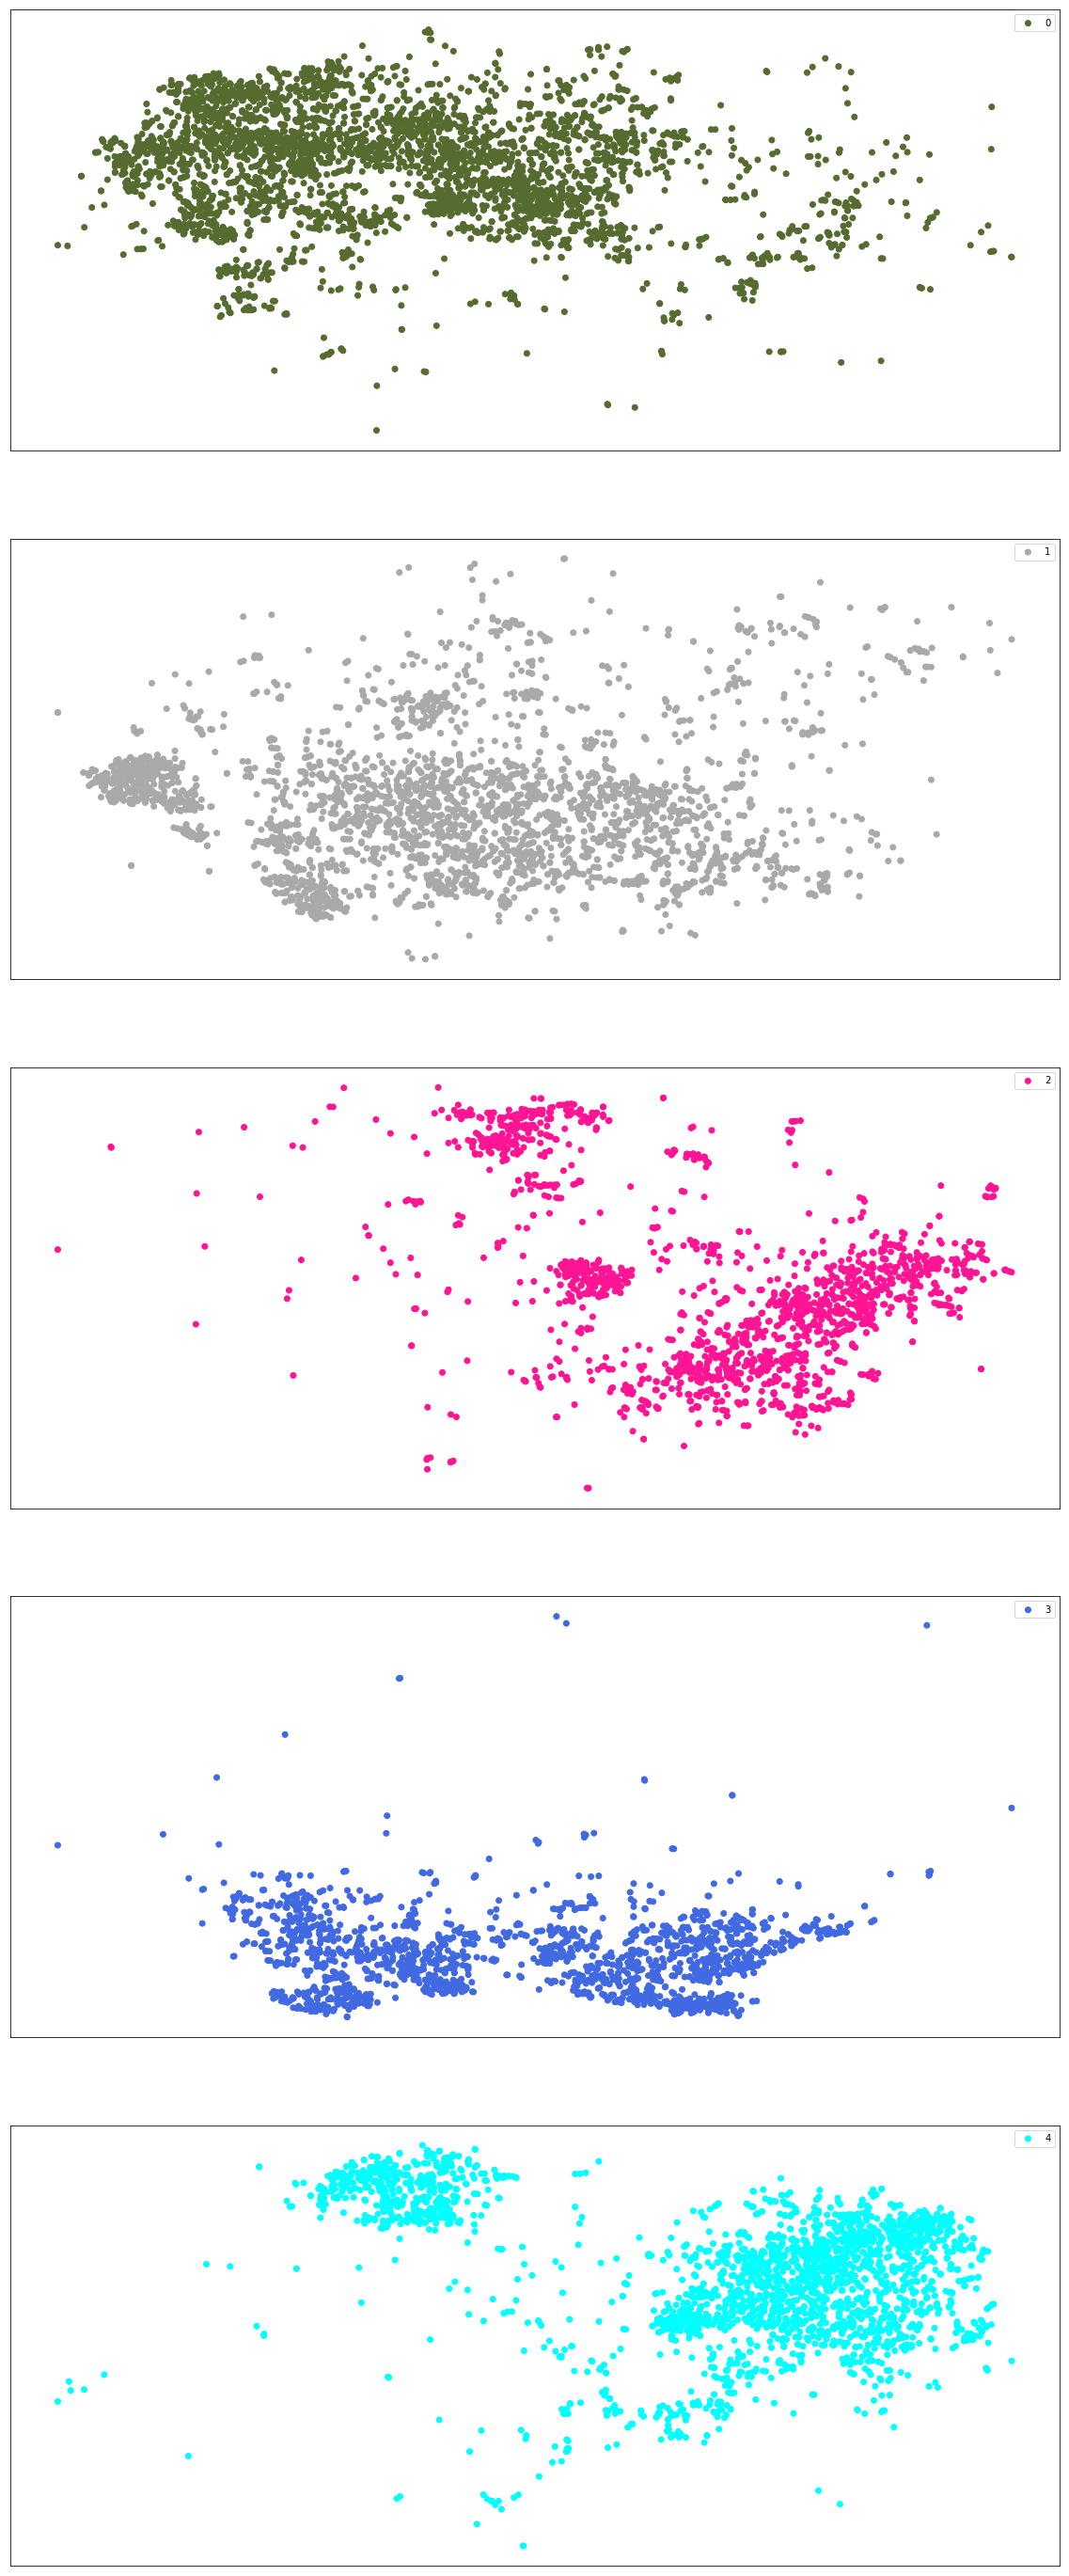

In [14]:
nonoverlap_plot(encoded_tsne, label_en, colors_en2)

### Term frequencies inspection